# 1. Import libraries and packages

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd "/content/gdrive/MyDrive/Finpros"

/content/gdrive/MyDrive/Finpros


In [ ]:
%ls

FPT.csv  MSN.csv  PNJ.csv  VIC.csv


In [ ]:
import glob

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

# 2. Import Dataset

In [ ]:
dfs = dict()
for filename in glob.glob("*.csv"):
  print(filename)
  dfs[filename.split(".")[0]] = pd.read_csv(filename)

FPT.csv
VIC.csv
PNJ.csv
MSN.csv


In [ ]:
for df in dfs.values():
  display(df.head())
  print()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2/28/2018 9:15,78.14,78.99,78.14,78.99,270,0
1,PNJ,2/28/2018 9:16,78.94,78.94,78.94,78.94,10,0
2,PNJ,2/28/2018 9:19,78.14,78.14,78.14,78.14,283,0
3,PNJ,2/28/2018 9:20,78.14,78.14,78.14,78.14,480,0
4,PNJ,2/28/2018 9:21,78.14,78.14,78.14,78.14,146,0


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0


### Data Processing 

- Rename columns
- Convert date/time field to datatime format
- Set new date/time column to index of each shares

In [ ]:
for df in dfs.values():
  df.rename(columns={'Ticker': 'ticker', 'Date/Time': 'time', 'Open': 'open', 'High': 'high',
                          'Low': 'low', 'Close': 'close', 'Volume': 'volume', 'Open Interest': 'oi'},
                      inplace=True)
  df['time'] = pd.to_datetime(df['time'], format='%m/%d/%Y %H:%M')
  df.sort_values(by="time", inplace=True)
  df.set_index('time', inplace=True)

Check again with MSN

In [ ]:
dfs['MSN'].head()

,ticker,open,high,low,close,volume,oi
time,,,,,,,
2017-12-25 09:15:00,MSN,73.1,73.1,73.1,73.1,4210,0
2017-12-25 09:16:00,MSN,73.0,73.0,73.0,73.0,5000,0
2017-12-25 09:18:00,MSN,73.5,73.5,73.5,73.5,210,0
2017-12-25 09:20:00,MSN,73.2,73.5,73.1,73.1,2050,0
2017-12-25 09:21:00,MSN,73.0,73.0,73.0,73.0,1380,0


### Descriptive Statistics about the Data

In [ ]:
for k in dfs.keys():
  print(k + ":")
  display(dfs[k].describe().transpose())

FPT:


,count,mean,std,min,25%,50%,75%,max
open,97406.0,45.071630,6.359803,30.25,39.74,46.95,49.20,58.4
high,97406.0,45.090138,6.364950,30.25,39.74,46.95,49.25,58.5
low,97406.0,45.051430,6.354245,30.22,39.70,46.95,49.17,58.4
close,97406.0,45.071631,6.359799,30.25,39.74,46.95,49.20,58.4
volume,97406.0,8044.172638,17532.025731,10.00,750.00,2960.00,8960.00,1255930.0
oi,97406.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0


VIC:


,count,mean,std,min,25%,50%,75%,max
open,101266.0,105.376460,11.543158,68.0,95.4,105.3,115.8,126.1
high,101266.0,105.418519,11.535584,68.0,95.4,105.3,115.9,126.5
low,101266.0,105.334147,11.552338,68.0,95.3,105.2,115.8,126.1
close,101266.0,105.378791,11.545054,68.0,95.4,105.3,115.8,126.5
volume,101266.0,3182.639583,14698.144776,10.0,230.0,1020.0,3000.0,1468390.0
oi,101266.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


PNJ:


,count,mean,std,min,25%,50%,75%,max
open,125309.0,72.182052,9.900263,44.43,64.60,72.80,80.16,100.16
high,125309.0,72.372590,9.995786,44.53,64.70,73.01,80.35,100.16
low,125309.0,72.042287,9.830847,44.04,64.57,72.64,80.06,100.16
close,125309.0,72.179371,9.899401,44.14,64.60,72.83,80.16,100.16
volume,125309.0,3031.830451,7248.952968,1.00,220.00,1000.00,3130.00,580730.00
oi,125309.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00


MSN:


,count,mean,std,min,25%,50%,75%,max
open,135354.0,74.878809,15.418074,46.5,57.9,79.1,86.0,117.8
high,135354.0,74.931668,15.426954,46.5,57.9,79.2,86.1,118.0
low,135354.0,74.834625,15.412677,46.4,57.8,79.1,86.0,117.7
close,135354.0,74.880759,15.418857,46.4,57.8,79.1,86.0,118.0
volume,135354.0,5683.577730,27985.133386,10.0,500.0,2000.0,5560.0,3300680.0
oi,135354.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


### Find the duration of dataset

In [ ]:
for k, df in dfs.items():
  print(k + ":")
  print("Starting date: ",df.index[0])
  print("Ending date: ", df.index[-1])
  print("Duration: ", df.index[-1]-df.index[0])
  print()

FPT:
Starting date:  2018-12-25 09:15:00
Ending date:  2020-12-22 14:46:00
Duration:  728 days 05:31:00

VIC:
Starting date:  2018-10-17 09:39:00
Ending date:  2020-12-22 14:46:00
Duration:  797 days 05:07:00

PNJ:
Starting date:  2018-02-28 09:15:00
Ending date:  2020-12-22 14:46:00
Duration:  1028 days 05:31:00

MSN:
Starting date:  2017-12-25 09:15:00
Ending date:  2020-12-22 14:46:00
Duration:  1093 days 05:31:00



### See the closing price chart

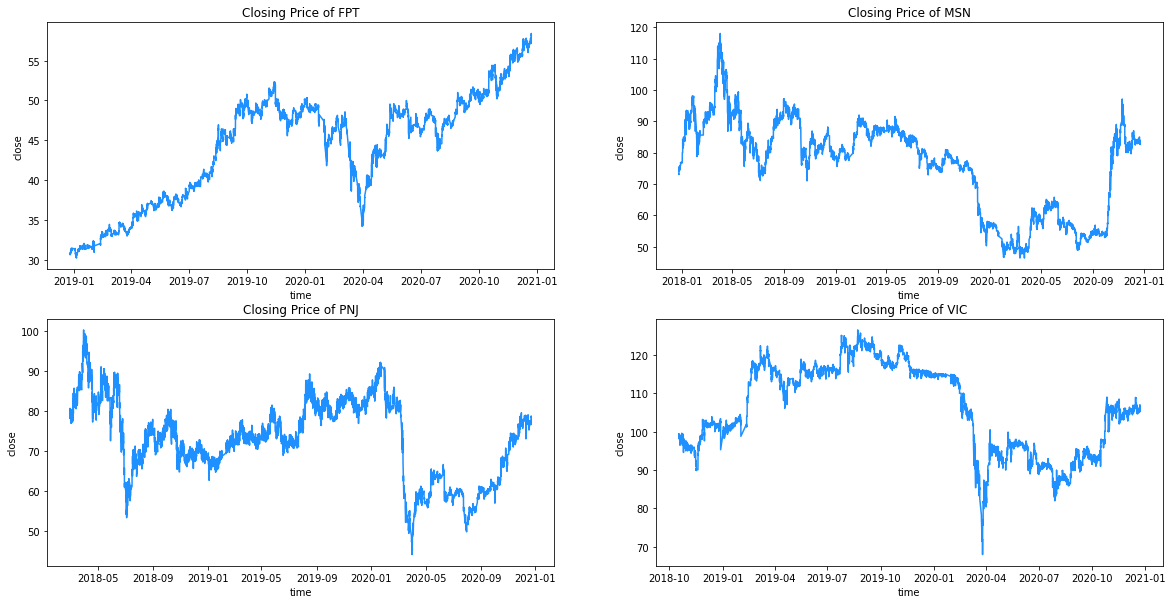

In [ ]:
nrows = 2
ncols = 2
f, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))

sns.lineplot(x=dfs['FPT'].index, y=dfs['FPT']['close'], data=dfs['FPT'], ax=ax[0,0], color='dodgerblue')
ax[0,0].set_title('Closing Price of FPT')
sns.lineplot(x=dfs['MSN'].index, y=dfs['MSN']['close'], data=dfs['MSN'], ax=ax[0,1], color='dodgerblue')
ax[0,1].set_title('Closing Price of MSN')
sns.lineplot(x=dfs['PNJ'].index, y=dfs['PNJ']['close'], data=dfs['PNJ'], ax=ax[1,0], color='dodgerblue')
ax[1,0].set_title('Closing Price of PNJ')
sns.lineplot(x=dfs['VIC'].index, y=dfs['VIC']['close'], data=dfs['VIC'], ax=ax[1,1], color='dodgerblue')
ax[1,1].set_title('Closing Price of VIC');

# 3. Some analysis on FPT

### Monthwise comparision between Stock open and close price

In [ ]:
FPT = dfs['FPT']
FPT = FPT.reset_index(drop=False)
monthvise = FPT.groupby(FPT['time'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,open,close
time,,
January,41.233369,41.232300
February,41.439381,41.439794
March,38.450255,38.449807
April,39.047859,39.047826
May,42.580028,42.579688
June,43.171007,43.170957
July,43.428285,43.428258
August,45.733369,45.733283
September,49.033856,49.034151


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

### Resampling to day-by-day

In [ ]:
FPT['date'] = FPT['time']
FPT['date'] = FPT['date'].astype(str).str.split(" ",expand=True)[0]
FPT['date'] = pd.to_datetime(FPT['date'], format='%Y/%m/%d')
FPT.head()

,time,ticker,open,high,low,close,volume,oi,date
0,2018-12-25 09:15:00,FPT,30.89,30.89,30.89,30.89,35410,0,2018-12-25
1,2018-12-25 09:16:00,FPT,30.81,30.81,30.81,30.81,190,0,2018-12-25
2,2018-12-25 09:17:00,FPT,30.74,30.81,30.74,30.74,1120,0,2018-12-25
3,2018-12-25 09:18:00,FPT,30.74,30.74,30.74,30.74,2120,0,2018-12-25
4,2018-12-25 09:19:00,FPT,30.74,30.74,30.74,30.74,22500,0,2018-12-25


In [ ]:
FPT = FPT.groupby('date').agg({'ticker':'max', 'open':'mean', 'high':'mean', 'low':'mean', 'close':'mean', 'volume':'sum', 'oi':'max'}).round(2)
FPT

,ticker,open,high,low,close,volume,oi
date,,,,,,,
2018-12-25,FPT,30.76,30.78,30.74,30.76,84960,0
2018-12-26,FPT,31.05,31.05,31.04,31.05,333590,0
2018-12-27,FPT,31.33,31.34,31.33,31.33,454860,0
2018-12-28,FPT,31.32,31.33,31.32,31.32,387170,0
2019-01-02,FPT,31.23,31.24,31.22,31.23,459120,0
...,...,...,...,...,...,...,...
2020-12-16,FPT,57.21,57.23,57.18,57.20,1995530,0
2020-12-17,FPT,56.72,56.74,56.69,56.72,3594500,0
2020-12-18,FPT,56.81,56.83,56.78,56.81,1532820,0


### Smoothing closing price

In [ ]:
ma_day = [30, 60, 90]

for ma in ma_day:
  column_name = f"{ma} days interval"
  FPT[column_name] = FPT['close'].rolling(ma).mean()

In [ ]:
FPT.columns

Index(['ticker', 'open', 'high', 'low', 'close', 'volume', 'oi',
       '30 days interval', '60 days interval', '90 days interval'],
      dtype='object')

<AxesSubplot:xlabel='date'>

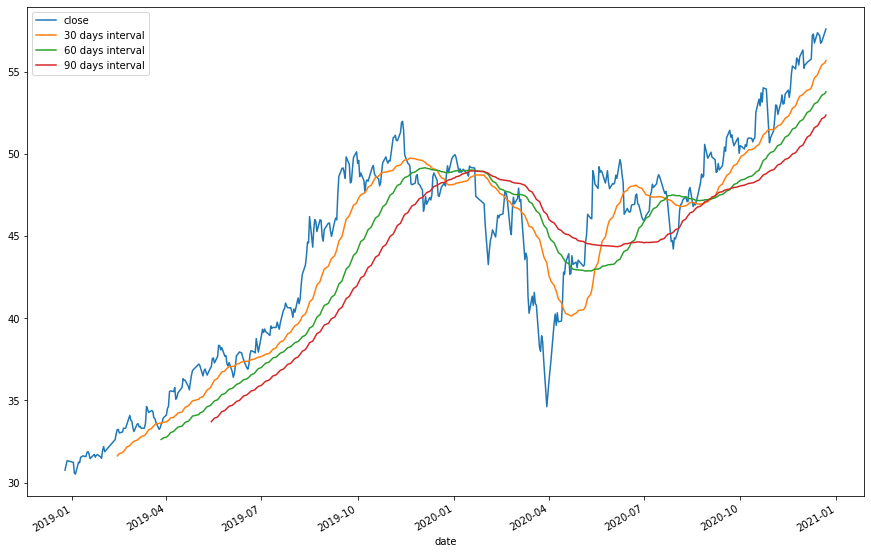

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(10)
fig.set_figwidth(15)
FPT[['close', '30 days interval', '60 days interval', '90 days interval']].plot(ax=axes)

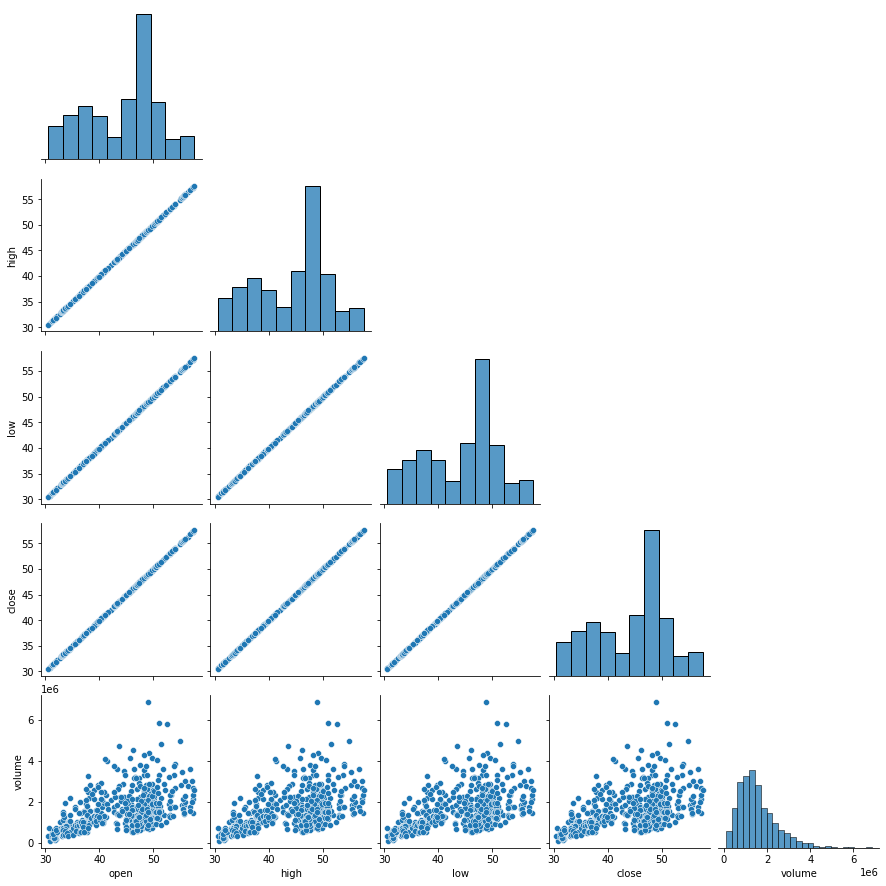

In [ ]:
sns.pairplot(FPT[['open', 'high', 'low', 'close', 'volume']], corner=True)

### Conclusion:

We can see that there are not much correlations between close and volume. So the `univariate` prediction approach is chosen.

# 4. Predicting the closing price stock price of FPT:

### Function to get train set and test set from the close price of each shares

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def scale_and_split_set(data, percent_train, time_step = 60):
  """
    data: filter 'close' column of the df
    percent_train: percent of splited train set
  """
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(data)

  training_data_len = int(np.ceil(len(data) * percent_train))

  # create train
  train_data = scaled_data[0:training_data_len, :]
  x_train = []
  y_train = []
  for i in range(time_step, len(train_data)):
      x_train.append(train_data[i-time_step:i, 0])
      y_train.append(train_data[i, 0])
  
  x_train, y_train = np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

  # create test
  test_data = scaled_data[training_data_len - time_step:, :]
  x_test = []
  y_test = data.values[training_data_len:, :]
  for i in range(time_step, len(test_data)):
      x_test.append(test_data[i-time_step:i, 0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

  return x_train, y_train, x_test, y_test, scaler, training_data_len

In [ ]:
loss_df = dict()
loss_df['ticker'] = []
loss_df['model'] = []
loss_df['rmse'] = []
loss_df

{'ticker': [], 'model': [], 'rmse': []}

## LSTM

In [ ]:
data = FPT.filter(['close'])
x_train, y_train, x_test, y_test, scaler, train_len = scale_and_split_set(data, percent_train=0.8)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((340, 60, 1), (340,), (99, 60, 1), (99, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
340/340 [==============================] - 5s 6ms/step - loss: 0.0069
Epoch 2/10
340/340 [==============================] - 2s 6ms/step - loss: 0.0029
Epoch 3/10
340/340 [==============================] - 2s 7ms/step - loss: 0.0023
Epoch 4/10
340/340 [==============================] - 2s 7ms/step - loss: 0.0017
Epoch 5/10
340/340 [==============================] - 2s 6ms/step - loss: 0.0016
Epoch 6/10
340/340 [==============================] - 2s 6ms/step - loss: 0.0014
Epoch 7/10
340/340 [==============================] - 2s 6ms/step - loss: 0.0014
Epoch 8/10
340/340 [==============================] - 2s 6ms/step - loss: 0.0012
Epoch 9/10
340/340 [==============================] - 2s 7ms/step - loss: 0.0011
Epoch 10/10
340/340 [==============================] - 2s 6ms/step - loss: 9.6625e-04


In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
loss_df['ticker'].append('FPT')
loss_df['model'].append('LSTM')
loss_df['rmse'].append(rmse)
rmse

4/4 [==============================] - 0s 7ms/step


0.9837893382212977

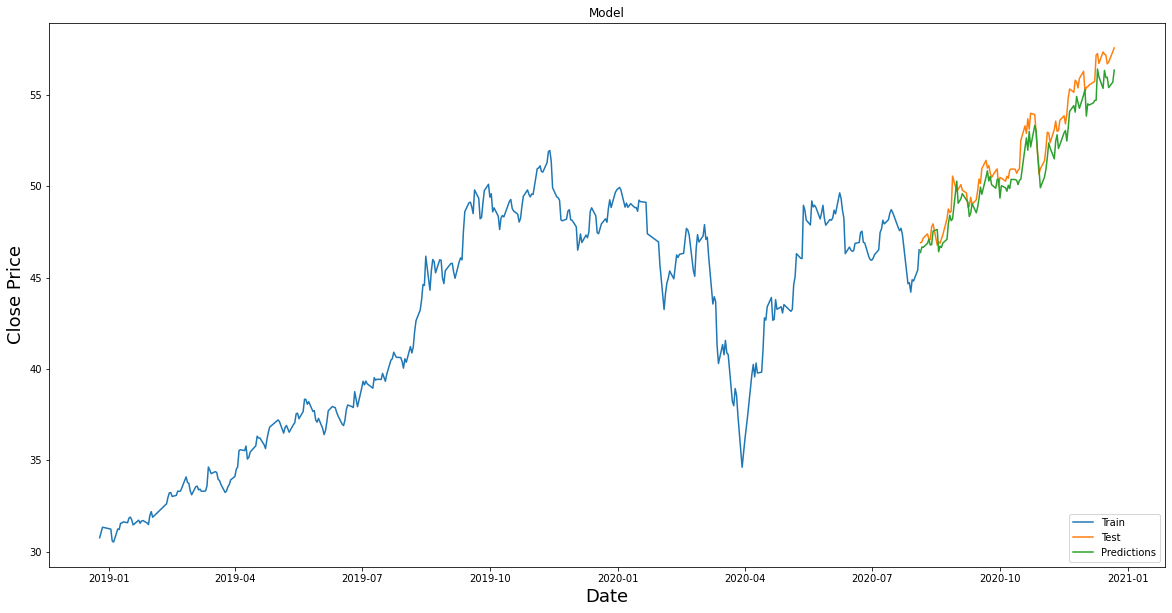

In [ ]:
# Plot the data
train = data[:400]
test = data[400:]
test['predictions'] = predictions
# Visualize the data
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['close'])
plt.plot(test[['close', 'predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show();

## GRU

In [ ]:
import keras
from keras.layers import GRU, Dropout

keras.backend.clear_session()
# Build the GRU model
model = Sequential()
model.add(GRU(32, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dropout(0.20))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
340/340 [==============================] - 7s 9ms/step - loss: 0.0129
Epoch 2/10
340/340 [==============================] - 3s 9ms/step - loss: 0.0061
Epoch 3/10
340/340 [==============================] - 3s 9ms/step - loss: 0.0055
Epoch 4/10
340/340 [==============================] - 3s 9ms/step - loss: 0.0059
Epoch 5/10
340/340 [==============================] - 3s 9ms/step - loss: 0.0042
Epoch 6/10
340/340 [==============================] - 3s 9ms/step - loss: 0.0036
Epoch 7/10
340/340 [==============================] - 3s 9ms/step - loss: 0.0029
Epoch 8/10
340/340 [==============================] - 3s 9ms/step - loss: 0.0030
Epoch 9/10
340/340 [==============================] - 3s 9ms/step - loss: 0.0028
Epoch 10/10
340/340 [==============================] - 3s 9ms/step - loss: 0.0025


In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
loss_df['ticker'].append('FPT')
loss_df['model'].append('GRU')
loss_df['rmse'].append(rmse)
rmse

4/4 [==============================] - 1s 5ms/step


0.9038206669846454

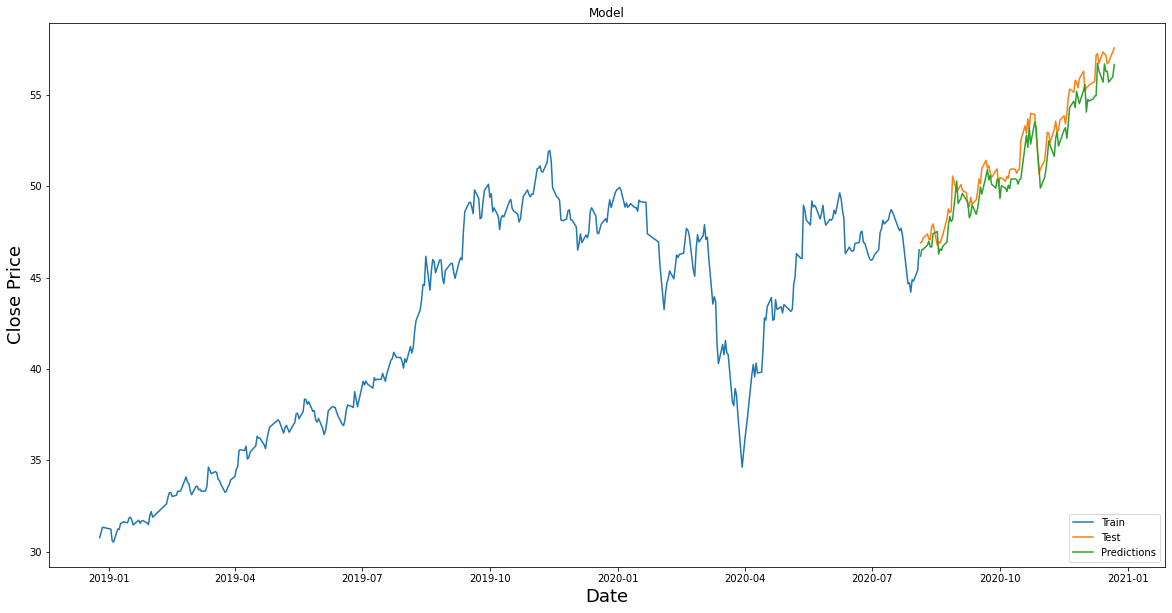

In [ ]:
# Plot the data
train = data[:400]
test = data[400:]
test['predictions'] = predictions
# Visualize the data
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['close'])
plt.plot(test[['close', 'predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show();

# 5. Predicting the closing price stock price of the rest, include VIC, PNJ, MSN:

### VIC with LSTM & GRU

In [ ]:
VIC = dfs['VIC']
VIC = VIC.reset_index(drop=False)
VIC['date'] = VIC['time']
VIC['date'] = VIC['date'].astype(str).str.split(" ",expand=True)[0]
VIC['date'] = pd.to_datetime(VIC['date'], format='%Y/%m/%d')
VIC = VIC.groupby('date').agg({'ticker':'max', 'open':'mean', 'high':'mean', 'low':'mean', 'close':'mean', 'volume':'sum', 'oi':'max'}).round(2)

data = VIC.filter(['close'])
x_train, y_train, x_test, y_test, scaler, train_len = scale_and_split_set(data, percent_train=0.8)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((379, 60, 1), (379,), (109, 60, 1), (109, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
loss_df['ticker'].append('VIC')
loss_df['model'].append('LSTM')
loss_df['rmse'].append(rmse)
print(rmse)

Epoch 1/10
379/379 [==============================] - 5s 6ms/step - loss: 0.0108
Epoch 2/10
379/379 [==============================] - 2s 6ms/step - loss: 0.0037
Epoch 3/10
379/379 [==============================] - 3s 7ms/step - loss: 0.0029
Epoch 4/10
379/379 [==============================] - 2s 6ms/step - loss: 0.0026
Epoch 5/10
379/379 [==============================] - 2s 6ms/step - loss: 0.0019
Epoch 6/10
379/379 [==============================] - 3s 8ms/step - loss: 0.0016
Epoch 7/10
379/379 [==============================] - 2s 6ms/step - loss: 0.0016
Epoch 8/10
379/379 [==============================] - 3s 7ms/step - loss: 0.0016
Epoch 9/10
379/379 [==============================] - 2s 6ms/step - loss: 0.0013
Epoch 10/10
4/4 [==============================] - 1s 4ms/step
1.5799408319305686


In [ ]:
import keras
from keras.layers import GRU, Dropout

keras.backend.clear_session()
# Build the GRU model
model = Sequential()
model.add(GRU(32, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dropout(0.20))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
loss_df['ticker'].append('VIC')
loss_df['model'].append('GRU')
loss_df['rmse'].append(rmse)
print(rmse)

Epoch 1/10
379/379 [==============================] - 8s 9ms/step - loss: 0.0257
Epoch 2/10
379/379 [==============================] - 3s 9ms/step - loss: 0.0088
Epoch 3/10
379/379 [==============================] - 3s 9ms/step - loss: 0.0093
Epoch 4/10
379/379 [==============================] - 4s 9ms/step - loss: 0.0076
Epoch 5/10
379/379 [==============================] - 3s 9ms/step - loss: 0.0062
Epoch 6/10
379/379 [==============================] - 4s 10ms/step - loss: 0.0059
Epoch 7/10
379/379 [==============================] - 4s 9ms/step - loss: 0.0056
Epoch 8/10
379/379 [==============================] - 3s 9ms/step - loss: 0.0048
Epoch 9/10
379/379 [==============================] - 4s 11ms/step - loss: 0.0047
Epoch 10/10
4/4 [==============================] - 1s 5ms/step
2.127796646903298


### MSN with LSTM & GRU

In [ ]:
MSN = dfs['MSN']
MSN = MSN.reset_index(drop=False)
MSN['date'] = MSN['time']
MSN['date'] = MSN['date'].astype(str).str.split(" ",expand=True)[0]
MSN['date'] = pd.to_datetime(MSN['date'], format='%Y/%m/%d')
MSN = MSN.groupby('date').agg({'ticker':'max', 'open':'mean', 'high':'mean', 'low':'mean', 'close':'mean', 'volume':'sum', 'oi':'max'}).round(2)

data = MSN.filter(['close'])
x_train, y_train, x_test, y_test, scaler, train_len = scale_and_split_set(data, percent_train=0.8)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((539, 60, 1), (539,), (149, 60, 1), (149, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
loss_df['ticker'].append('MSN')
loss_df['model'].append('LSTM')
loss_df['rmse'].append(rmse)
print(rmse)

Epoch 1/10
539/539 [==============================] - 6s 7ms/step - loss: 0.0056
Epoch 2/10
539/539 [==============================] - 3s 6ms/step - loss: 0.0020
Epoch 3/10
539/539 [==============================] - 3s 6ms/step - loss: 0.0014
Epoch 4/10
539/539 [==============================] - 4s 7ms/step - loss: 0.0011
Epoch 5/10
539/539 [==============================] - 3s 6ms/step - loss: 0.0010
Epoch 6/10
539/539 [==============================] - 3s 6ms/step - loss: 0.0011
Epoch 7/10
539/539 [==============================] - 4s 7ms/step - loss: 9.6665e-04
Epoch 8/10
539/539 [==============================] - 3s 6ms/step - loss: 8.4449e-04
Epoch 9/10
539/539 [==============================] - 3s 6ms/step - loss: 8.0331e-04
Epoch 10/10
5/5 [==============================] - 1s 5ms/step
2.296850846309897


In [ ]:
import keras
from keras.layers import GRU, Dropout

keras.backend.clear_session()
# Build the GRU model
model = Sequential()
model.add(GRU(32, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dropout(0.20))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
loss_df['ticker'].append('MSN')
loss_df['model'].append('GRU')
loss_df['rmse'].append(rmse)
print(rmse)

Epoch 1/10
539/539 [==============================] - 9s 10ms/step - loss: 0.0097
Epoch 2/10
539/539 [==============================] - 5s 10ms/step - loss: 0.0054
Epoch 3/10
539/539 [==============================] - 5s 9ms/step - loss: 0.0038
Epoch 4/10
539/539 [==============================] - 5s 10ms/step - loss: 0.0031
Epoch 5/10
539/539 [==============================] - 5s 8ms/step - loss: 0.0027
Epoch 6/10
539/539 [==============================] - 5s 9ms/step - loss: 0.0027
Epoch 7/10
539/539 [==============================] - 4s 8ms/step - loss: 0.0023
Epoch 8/10
539/539 [==============================] - 4s 8ms/step - loss: 0.0024
Epoch 9/10
539/539 [==============================] - 5s 9ms/step - loss: 0.0017
Epoch 10/10
5/5 [==============================] - 1s 5ms/step
1.5157937283833187


### PNJ with LSTM & GRU

In [ ]:
PNJ = dfs['PNJ']
PNJ = PNJ.reset_index(drop=False)
PNJ['date'] = PNJ['time']
PNJ['date'] = PNJ['date'].astype(str).str.split(" ",expand=True)[0]
PNJ['date'] = pd.to_datetime(PNJ['date'], format='%Y/%m/%d')
PNJ = PNJ.groupby('date').agg({'ticker':'max', 'open':'mean', 'high':'mean', 'low':'mean', 'close':'mean', 'volume':'sum', 'oi':'max'}).round(2)

data = PNJ.filter(['close'])
x_train, y_train, x_test, y_test, scaler, train_len = scale_and_split_set(data, percent_train=0.8)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((508, 60, 1), (508,), (141, 60, 1), (141, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
loss_df['ticker'].append('PNJ')
loss_df['model'].append('LSTM')
loss_df['rmse'].append(rmse)
print(rmse)

Epoch 1/10
508/508 [==============================] - 6s 6ms/step - loss: 0.0066
Epoch 2/10
508/508 [==============================] - 3s 7ms/step - loss: 0.0029
Epoch 3/10
508/508 [==============================] - 3s 6ms/step - loss: 0.0019
Epoch 4/10
508/508 [==============================] - 3s 6ms/step - loss: 0.0019
Epoch 5/10
508/508 [==============================] - 3s 6ms/step - loss: 0.0014
Epoch 6/10
508/508 [==============================] - 4s 7ms/step - loss: 0.0014
Epoch 7/10
508/508 [==============================] - 3s 6ms/step - loss: 0.0014
Epoch 8/10
508/508 [==============================] - 3s 6ms/step - loss: 0.0014
Epoch 9/10
508/508 [==============================] - 3s 6ms/step - loss: 0.0013
Epoch 10/10
5/5 [==============================] - 1s 4ms/step
1.3906440346836997


In [ ]:
import keras
from keras.layers import GRU, Dropout

keras.backend.clear_session()
# Build the GRU model
model = Sequential()
model.add(GRU(32, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dropout(0.20))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
loss_df['ticker'].append('PNJ')
loss_df['model'].append('GRU')
loss_df['rmse'].append(rmse)
print(rmse)

Epoch 1/10
508/508 [==============================] - 8s 8ms/step - loss: 0.0099
Epoch 2/10
508/508 [==============================] - 4s 8ms/step - loss: 0.0055
Epoch 3/10
508/508 [==============================] - 4s 8ms/step - loss: 0.0054
Epoch 4/10
508/508 [==============================] - 4s 9ms/step - loss: 0.0036
Epoch 5/10
508/508 [==============================] - 4s 8ms/step - loss: 0.0040
Epoch 6/10
508/508 [==============================] - 4s 8ms/step - loss: 0.0029
Epoch 7/10
508/508 [==============================] - 4s 9ms/step - loss: 0.0028
Epoch 8/10
508/508 [==============================] - 4s 8ms/step - loss: 0.0028
Epoch 9/10
508/508 [==============================] - 4s 8ms/step - loss: 0.0025
Epoch 10/10
5/5 [==============================] - 1s 5ms/step
1.7879689305962385


# 6. Models Comparison 

In [ ]:
# loss_df['ticker'] = loss_df['ticker'][:3]
# loss_df['model'] = loss_df['model'][:3]
# loss_df['rmse'] = loss_df['rmse'][:3]

In [ ]:
loss_df = pd.DataFrame(loss_df)
loss_df

,ticker,model,rmse
0,FPT,LSTM,0.983789
1,FPT,GRU,0.903821
2,VIC,LSTM,1.579941
3,VIC,GRU,2.127797
4,MSN,LSTM,2.296851
5,MSN,GRU,1.515794
6,PNJ,LSTM,1.390644
7,PNJ,GRU,1.787969


<AxesSubplot:xlabel='ticker', ylabel='rmse'>

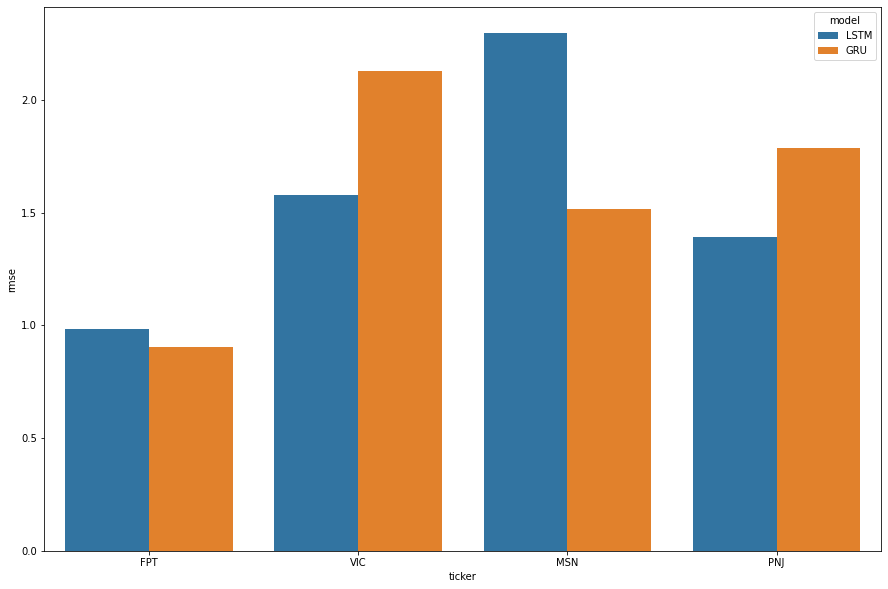

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=loss_df, x='ticker', y='rmse', hue='model')